## Train a model with bike rental data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [2]:
## check for columns name
column_list_file = '../data/rob_bike_train_column_list.txt'
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'hour']

In [3]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv('../data/rob_bike_train.csv', names=columns)
display(df_train.head())

df_validation = pd.read_csv('../data/rob_bike_validation.csv', names=columns)
display(df_validation.head())

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,9,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,8,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,11,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,8,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,4,6


,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,6,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,2,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,2,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,12,8


In [4]:
## Preparing Independent features and dependent feature
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

display(X_train.head(3))
## XGBoost accepts target variable in first column

C:\Users\yrobi\AppData\Local\Temp\ipykernel_26588\3270760259.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = df_train.iloc[:,0].ravel() # Target: 0th column
C:\Users\yrobi\AppData\Local\Temp\ipykernel_26588\3270760259.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_validation = df_validation.iloc[:,0].ravel()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,3,0,0,2,26.24,30.305,73,7.0015,2011,9,9,0
1,3,0,1,1,32.80,34.850,33,7.0015,2012,8,8,14
2,4,0,0,1,15.58,19.695,40,11.0014,2011,11,11,17


In [5]:
## Hyperparameter Optimization
params = {}
params['learning_rate'] = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
params['max_depth'] = [3, 4, 5, 6, 8, 10, 12, 15]
params['min_child_weight'] = [1, 3, 5, 7]
params['gamma'] = [0, 0.1, 0.2, 0.3, 0.4]
params['colsample_bytree'] = [0.3, 0.4, 0.5, 0.7]
params

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [6]:
## Search  CV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [7]:
regressor = xgb.XGBRegressor()

In [8]:
##
random_search = RandomizedSearchCV(regressor, param_distributions = params, n_iter = 5, cv = 5, n_jobs=-1, verbose=3)
random_search

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [9]:
##
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [10]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [11]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
# # XGBoost Training Parameter Reference: 
# #   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
# #regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
# regressor = xgb.XGBRegressor(max_depth=5, n_estimators=150)
# regressor

In [13]:
regressor = xgb.XGBRegressor(colsample_bytree= 0.7, 
                             gamma = 0.3, 
                             learning_rate = 0.05,
                             max_depth = 12,
                             min_child_weight = 5)
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
## Aprroximation target variable by training on train data
regressor.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:1.36520	validation_1-rmse:1.33261
[1]	validation_0-rmse:1.33604	validation_1-rmse:1.31276
[2]	validation_0-rmse:1.27971	validation_1-rmse:1.25984
[3]	validation_0-rmse:1.24901	validation_1-rmse:1.23726
[4]	validation_0-rmse:1.19214	validation_1-rmse:1.18242
[5]	validation_0-rmse:1.16646	validation_1-rmse:1.16350
[6]	validation_0-rmse:1.14246	validation_1-rmse:1.14644
[7]	validation_0-rmse:1.12121	validation_1-rmse:1.13330
[8]	validation_0-rmse:1.07575	validation_1-rmse:1.09087
[9]	validation_0-rmse:1.05265	validation_1-rmse:1.07573
[10]	validation_0-rmse:1.03134	validation_1-rmse:1.06255
[11]	validation_0-rmse:0.98546	validation_1-rmse:1.01831
[12]	validation_0-rmse:0.94173	validation_1-rmse:0.97638
[13]	validation_0-rmse:0.92463	validation_1-rmse:0.96510
[14]	validation_0-rmse:0.88989	validation_1-rmse:0.93352
[15]	validation_0-rmse:0.85216	validation_1-rmse:0.89768
[16]	validation_0-rmse:0.82006	validation_1-rmse:0.86880
[17]	validation_0-rmse:0.78570	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
## Summary statistics of target variable
df_train['count'].describe()

count    7620.000000
mean        4.583886
std         1.429959
min         0.693147
25%         3.737670
50%         4.976734
75%         5.652489
max         6.885510
Name: count, dtype: float64

In [16]:
## Result after training on train set
eval_result = regressor.evals_result()
# print(eval_result)

Length of Training Rounds (or Iteration):  range(0, 100)


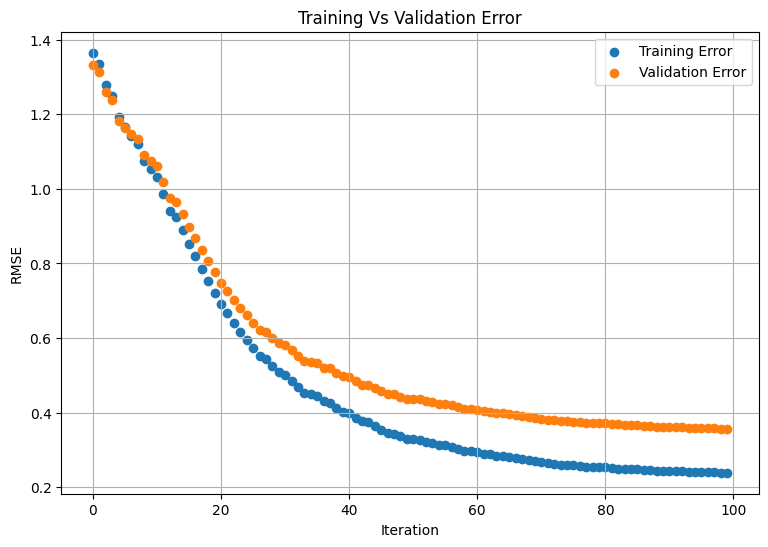

In [17]:
### Plotting "training error" vs. "validation error" -- to check model performance
## No.of Iterations
training_rounds = range(len(eval_result['validation_0']['rmse']))
print("Length of Training Rounds (or Iteration): ", training_rounds)

## plot
plt.figure(figsize=(9,6))
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

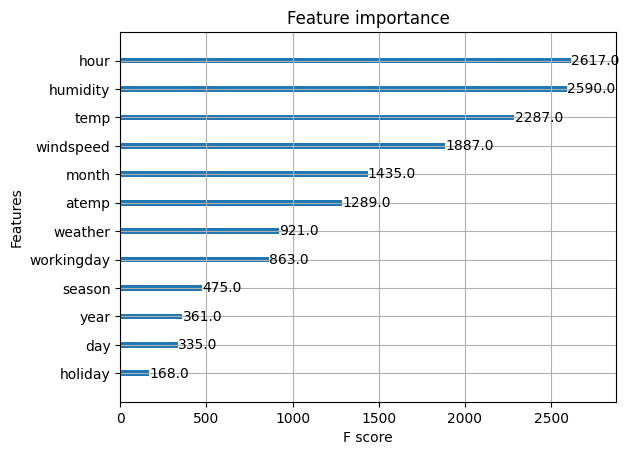

In [18]:
## Feature importance
xgb.plot_importance(regressor)
plt.show()

## Note: "hour is the most important features", also 
# "humidty", "temperature", "day" plays important role

## Prediction validation dataset --- test for this case

In [19]:
# Updated - Changed to validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df_test = pd.read_csv("../data/rob_bike_validation.csv", names=columns)
df_test.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,6,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,2,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,2,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,12,8


In [20]:
## Input features from validation dataset 
# 
X_test = df_test.iloc[:,1:] ## This features will be feed into trained model to predict bike rental count
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,8
1,2,0,0,1,32.80,37.880,55,12.9980,2011,6,6,13
2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,2,2
3,1,0,1,1,9.02,9.090,47,36.9974,2011,2,2,10
4,4,0,0,1,10.66,15.150,87,0.0000,2011,12,12,8


In [21]:
## Prediction on test data
result = regressor.predict(X_test)
result[:5]

array([5.8257356, 5.935296 , 2.2905169, 4.0498714, 4.519    ],
      dtype=float32)

In [22]:
## Let's add predicted count column to the test dataframe
df_test['pred_count'] = result

## check test data now
df_test.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,pred_count
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,8,5.825736
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,6,13,5.935296
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,2,2,2.290517
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,2,10,4.049871
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,12,8,4.519000


In [23]:
## Inverse the log transformation to get the exact bike rental
df_test['count'] = df_test['count'].map(np.expm1)
df_test['pred_count'] = df_test['pred_count'].map(np.expm1)

In [24]:
# Summary Statistics of predicted bike rental counts
df_test['pred_count'].describe()

count    3266.000000
mean      174.381494
std       156.266155
min         1.455340
25%        44.040430
50%       138.144243
75%       258.544490
max       793.216618
Name: pred_count, dtype: float64

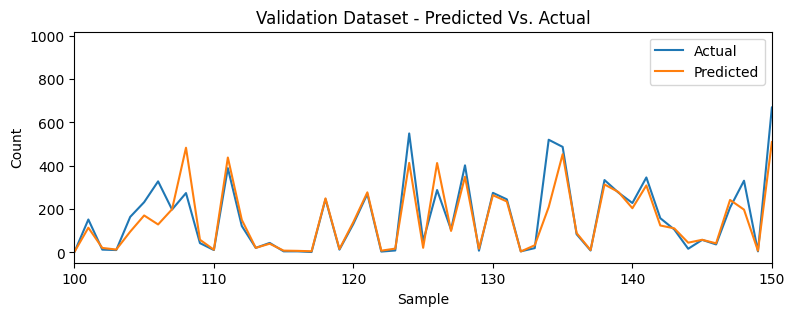

In [25]:
# Actual vs Predicted
plt.figure(figsize=(9,3))
plt.plot(df_test['count'], label='Actual')
plt.plot(df_test['pred_count'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

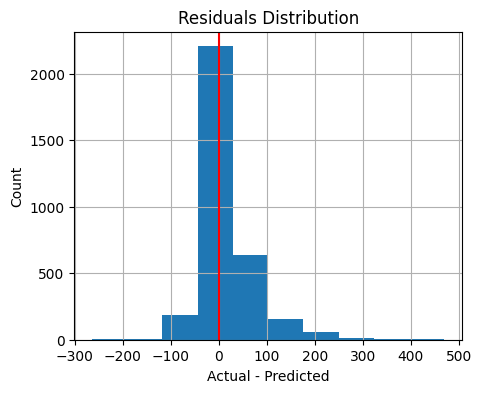

In [26]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df_test['count'] - df_test['pred_count'])
plt.figure(figsize=(5,4))
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [27]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.56
 Over  Estimation: 0.44


In [28]:
### Model Evaluation
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df_test['count'],
                                                    df_test['pred_count'])**.5))

RMSE: 58.20


In [29]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [30]:
print("RMSLE: {0:.2f}".format(compute_rmsle(df_test['count'], df_test['pred_count'])))

RMSLE: 0.36


### Prepare Data for Submission to Kaggle

In [31]:
# Prepare Data for Submission to Kaggle
df_org_test = pd.read_csv("../data/rob_bike_test.csv", parse_dates=['datetime'])
df_org_test.head()

C:\Users\yrobi\AppData\Local\Temp\ipykernel_26588\312279549.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_org_test = pd.read_csv("../data/rob_bike_test.csv", parse_dates=['datetime'])


,datetime,datetime.1,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,0
1,1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,1
2,2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,2
3,3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,3
4,4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,4


In [32]:
test_X =  df_org_test.iloc[:,2:] # Exclude datetime for prediction
test_X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,4


In [33]:
## Prediction original test data
result = regressor.predict(test_X)
print(result[:5])

## Inverse the log transformation
np.expm1(result)

[2.3034012 1.916802  1.7192452 1.3071742 1.1878443]


array([  9.008164 ,   5.79918  ,   4.5803146, ..., 148.35916  ,
        94.05075  ,  58.9863   ], dtype=float32)

In [34]:
# Convert result to actual count
df_org_test["count"] = np.expm1(result)
df_org_test.head()

,datetime,datetime.1,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
0,0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,0,9.008164
1,1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,1,5.799180
2,2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,2,4.580315
3,3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,3,2.695716
4,4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,4,2.280003


In [35]:
## check if count is less than 0-- which is not possible in real life
df_org_test[df_org_test["count"] < 0]

,datetime,datetime.1,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count


In [36]:
df_org_test[['datetime.1','count']].to_csv('../data/predicted_count.csv',index=False)

In [37]:
sub = pd.read_csv("../data/predicted_count.csv")
sub.head()

,datetime.1,count
0,2011-01-20 00:00:00,9.008164
1,2011-01-20 01:00:00,5.799180
2,2011-01-20 02:00:00,4.580315
3,2011-01-20 03:00:00,2.695716
4,2011-01-20 04:00:00,2.280003


In [38]:
# RMSLE (Kaggle) Score
# Test 1: 0.62
# Test 2(log of count): 0.32